# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

#Import API key
from api_keys import api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
#Weather Map API Calling
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
#List of the City Weather Data
Weather_Data = []

#Call counter starting point of count
record = 1
g = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through all the cities in our list
for g, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (g % 50 == 0 and g >= 50):
        g += 1
        record = 0

    #Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    #Log the url, record, and g components
    print("Processing Record %s of Set %s | %s" % (record, g, city))

    #Append the record count by 1
    record += 1

    #Run an API request for each city
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #Populate the City information into Weather_Data list
        Weather_Data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 0 | hithadhoo
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 2 | salalah
Processing Record 4 of Set 3 | shache
Processing Record 5 of Set 4 | clyde river
Processing Record 6 of Set 5 | qandahar
City not found. Skipping...
Processing Record 7 of Set 6 | norman wells
Processing Record 8 of Set 7 | albany
Processing Record 9 of Set 8 | jamestown
Processing Record 10 of Set 9 | dolbeau
City not found. Skipping...
Processing Record 11 of Set 10 | yellowknife
Processing Record 12 of Set 11 | atuona
Processing Record 13 of Set 12 | bredasdorp
Processing Record 14 of Set 13 | gormi
City not found. Skipping...
Processing Record 15 of Set 14 | komsomolskiy
Processing Record 16 of Set 15 | vega de alatorre
Processing Record 17 of Set 16 | plastun
Processing Record 18 of Set 17 | longyearbyen
Processing Record 19 of Set 18 | bethel
Processing Record 20 of Set 19 | lolua
City not found. Skippin

Processing Record 27 of Set 177 | arman
Processing Record 28 of Set 178 | teguise
Processing Record 29 of Set 179 | kahului
Processing Record 30 of Set 180 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 181 | prince rupert
Processing Record 32 of Set 182 | yarmouth
Processing Record 33 of Set 183 | tomari
Processing Record 34 of Set 184 | ossora
Processing Record 35 of Set 185 | kupang
Processing Record 36 of Set 186 | kodiak
Processing Record 37 of Set 187 | north platte
Processing Record 38 of Set 188 | kapit
Processing Record 39 of Set 189 | isangel
Processing Record 40 of Set 190 | mar del plata
Processing Record 41 of Set 191 | pyay
Processing Record 42 of Set 192 | abu dhabi
Processing Record 43 of Set 193 | praia da vitoria
Processing Record 44 of Set 194 | faanui
Processing Record 45 of Set 195 | ambilobe
Processing Record 46 of Set 196 | hun
Processing Record 47 of Set 197 | kolokani
Processing Record 48 of Set 198 | sioux lookout
Processing Record 49 of Se

Processing Record 6 of Set 356 | chokurdakh
Processing Record 7 of Set 357 | port macquarie
Processing Record 8 of Set 358 | nouadhibou
Processing Record 9 of Set 359 | bonao
Processing Record 10 of Set 360 | nanortalik
Processing Record 11 of Set 361 | provideniya
Processing Record 12 of Set 362 | marystown
Processing Record 13 of Set 363 | tiksi
Processing Record 14 of Set 364 | geraldton
Processing Record 15 of Set 365 | solikamsk
Processing Record 16 of Set 366 | kiunga
Processing Record 17 of Set 367 | mildura
Processing Record 18 of Set 368 | truth or consequences
Processing Record 19 of Set 369 | raudeberg
Processing Record 20 of Set 370 | orlik
Processing Record 21 of Set 371 | angelholm
City not found. Skipping...
Processing Record 22 of Set 372 | tyumentsevo
Processing Record 23 of Set 373 | lebowakgomo
Processing Record 24 of Set 374 | tokoroa
Processing Record 25 of Set 375 | disna
City not found. Skipping...
Processing Record 26 of Set 376 | kilosa
Processing Record 27 of 

Processing Record 39 of Set 539 | calvinia
Processing Record 40 of Set 540 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 541 | mahebourg
Processing Record 42 of Set 542 | lorengau
Processing Record 43 of Set 543 | kazalinsk
City not found. Skipping...
Processing Record 44 of Set 544 | yurla
Processing Record 45 of Set 545 | tigzirt
Processing Record 46 of Set 546 | nome
Processing Record 47 of Set 547 | maniitsoq
Processing Record 48 of Set 548 | paralimni
Processing Record 49 of Set 549 | zhigalovo
Processing Record 0 of Set 551 | urucara
Processing Record 1 of Set 551 | klaksvik
Processing Record 2 of Set 552 | bolungarvik
City not found. Skipping...
Processing Record 3 of Set 553 | hami
Processing Record 4 of Set 554 | moranbah
Processing Record 5 of Set 555 | tilichiki
Processing Record 6 of Set 556 | turan
Processing Record 7 of Set 557 | ixtapa
Processing Record 8 of Set 558 | berlevag
Processing Record 9 of Set 559 | perigueux
Processing Record 10 of Set 56

In [45]:
#Convert Array into DataFrame
Weather_Data_pd = pd.DataFrame(Weather_Data)

#Extract necessary dataframe fields
lats = Weather_Data_pd["Lat"]
wind_speed = Weather_Data_pd["Wind Speed"]
cloudiness = Weather_Data_pd["Cloudiness"]
humidity = Weather_Data_pd["Humidity"]
max_temps = Weather_Data_pd["Max Temp"]

#Save Data Frame to CSV
Weather_Data_pd.to_csv('Output_CSV/Weather_Data.csv')

#Display the records retrieved & extracted
Weather_Data_pd.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [48]:
#Display the obtained populated DataFrame
Weather_Data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.60,73.08,82.31,73,80,9.01,MV,1576233078
1,sao filipe,14.90,-24.50,74.34,62,21,16.02,CV,1576233078
2,salalah,17.01,54.10,84.20,62,0,9.17,OM,1576233078
3,shache,38.42,77.24,33.01,80,98,2.24,CN,1576233078
4,clyde river,70.47,-68.59,-9.22,73,96,9.62,CA,1576233078


#### Latitude vs. Temperature Plot

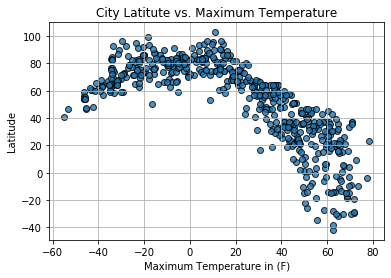

In [50]:
#Visualizing a Scatter Plot for Latitude vs. Temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Formating of Scatter Plot
plt.title("City Latitute vs. Maximum Temperature")
plt.xlabel("Maximum Temperature in (F)")
plt.ylabel("Latitude")
plt.grid(True)

#Save the Plot
plt.savefig("Latitude (vs) Temperature Plot.png")

#Display Plot
plt.show()

#### Latitude vs. Humidity Plot

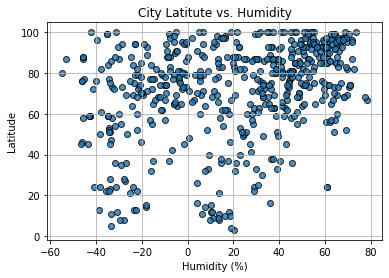

In [54]:
#Visualizing a Scatter Plot for Latitude vs. Humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Formating of Scatter Plot
plt.title("City Latitute vs. Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)

#Save the Plot
plt.savefig("Latitude (vs) Humidity Plot.png")

#Display Plot
plt.show()

#### Latitude vs. Cloudiness Plot

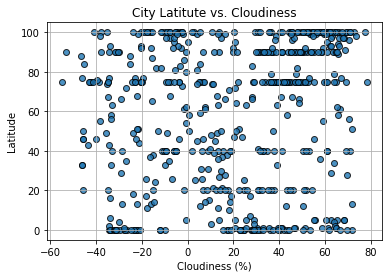

In [53]:
#Visualizing a Scatter Plot for Latitude vs. Cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


#Formating of Scatter Plot
plt.title("City Latitute vs. Cloudiness")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)

#Save the Plot
plt.savefig("Latitude (vs) Cloudiness Plot.png")

#Display Plot
plt.show()

#### Latitude vs. Wind Speed Plot

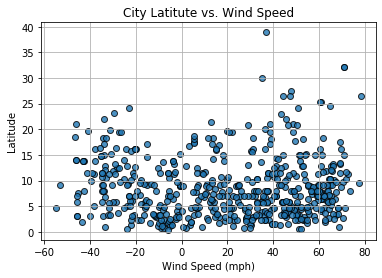

In [52]:
#Visualizing a Scatter Plot for Latitude vs. Wind Speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")



#Formating of Scatter Plot
plt.title("City Latitute vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)

#Save the Plot
plt.savefig("Latitude (vs) Wind Speed Plot.png")

#Display Plot
plt.show()